In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree_rf_large.pkl")
#res_ex = load_pickle_zip("../models/solutions/tree.pkl")

In [4]:
model_.N

121

In [5]:
betas = np.arange(0.1,2.1,1e-1)

In [6]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=10000, bias = True,
                            std_fe_limit=1e-05,batch_size=1000,lr=0.01,
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.366 std_fe: 1.01E-05 M: 0.229 S: 0.652 E: -0.842: 0.234, B1 = -0.650
fe: -4.272 std_fe: 9.90E-06 M: 0.412 S: 0.560 E: -1.474: 0.412, B1 = -1.005
fe: -3.411 std_fe: 2.17E-05 M: 0.542 S: 0.462 E: -1.872: 0.542, B1 = -1.244
fe: -3.059 std_fe: 4.87E-05 M: 0.635 S: 0.380 E: -2.109: 0.633, B1 = -1.462
fe: -2.884 std_fe: 3.34E-05 M: 0.699 S: 0.316 E: -2.253: 0.7, B1 = -1.68282
fe: -2.787 std_fe: 1.09E-05 M: 0.746 S: 0.268 E: -2.340: 0.75, B1 = -1.9033
fe: -2.728 std_fe: 2.01E-05 M: 0.782 S: 0.230 E: -2.399: 0.783, B1 = -2.125
fe: -2.689 std_fe: 1.21E-04 M: 0.808 S: 0.202 E: -2.436: 0.809, B1 = -2.346
fe: -2.663 std_fe: 1.08E-05 M: 0.830 S: 0.180 E: -2.463: 0.829, B1 = -2.566
fe: -2.644 std_fe: 4.50E-05 M: 0.845 S: 0.162 E: -2.481: 0.846, B1 = -2.785
fe: -2.630 std_fe: 2.50E-05 M: 0.859 S: 0.147 E: -2.496M: 0.859, B1 = -3.005
fe: -2.619 std_fe: 3.30E-05 M: 0.870 S: 0.136 E: -2.506: 0.87, B1 = -3.2255
fe: -2.610 std_fe: 3.34E-05 M: 0.880 S: 0.125 E: -2.514: 0.88, B1 = -3.4466
fe: -2.604 

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = False, 
                           x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.366 std_fe: 8.69E-08 M: 0.227 S: 0.653 E: -0.840: 0.224, B1 = -0.650
fe: -4.272 std_fe: 1.05E-07 M: 0.410 S: 0.560 E: -1.473: 0.41, B1 = -1.0055
fe: -3.411 std_fe: 2.17E-07 M: 0.544 S: 0.461 E: -1.876: 0.545, B1 = -1.244
 0.40 2709 fe: -3.059 +- 0.00002 E: -2.106, S: 0.381, M: 0.632, B1 = -1.462

KeyboardInterrupt: 

In [8]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.366, ener: -0.844, M: 0.228, iter 6
fe: -4.272, ener: -1.472, M: 0.411, iter 6
fe: -3.411, ener: -1.871, M: 0.542, iter 6
fe: -3.059, ener: -2.110, M: 0.634, iter 6
fe: -2.884, ener: -2.252, M: 0.699, iter 6
fe: -2.787, ener: -2.341, M: 0.747, iter 6
fe: -2.728, ener: -2.398, M: 0.782, iter 6
fe: -2.689, ener: -2.437, M: 0.808, iter 6
fe: -2.663, ener: -2.463, M: 0.829, iter 6
fe: -2.644, ener: -2.482, M: 0.846, iter 6
fe: -2.630, ener: -2.496, M: 0.859, iter 6
fe: -2.619, ener: -2.506, M: 0.870, iter 6
fe: -2.610, ener: -2.514, M: 0.880, iter 6
fe: -2.604, ener: -2.521, M: 0.888, iter 6
fe: -2.598, ener: -2.526, M: 0.895, iter 6
fe: -2.594, ener: -2.530, M: 0.902, iter 6
fe: -2.590, ener: -2.534, M: 0.907, iter 6
fe: -2.587, ener: -2.537, M: 0.912, iter 5
fe: -2.585, ener: -2.539, M: 0.917, iter 6
fe: -2.583, ener: -2.541, M: 0.921, iter 6


In [9]:
from save_data import save_pickle_zip
name_file="tree_large_rf"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [10]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_bp = all_res["bp"]

In [11]:
res_ex = res_bp

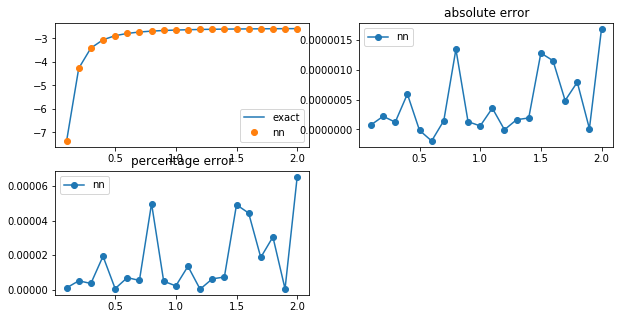

In [12]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_nn], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

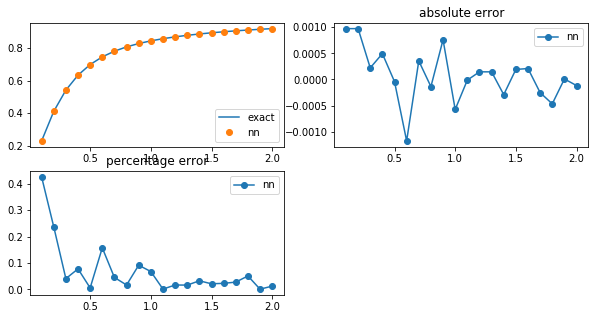

In [13]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_nn])
plt.show()

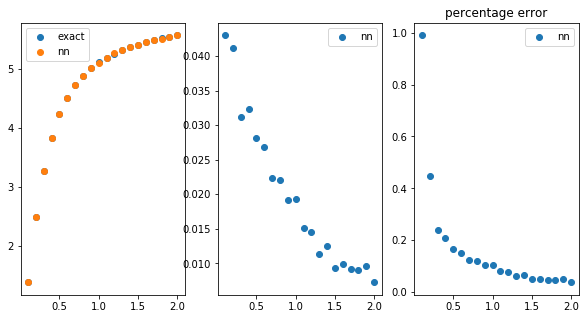

In [14]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_nn], init_=0)
plt.show()

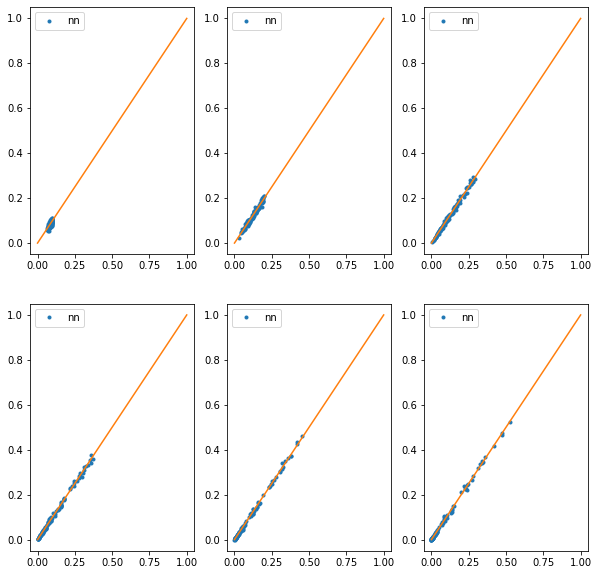

In [15]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_nn], model_.J_interaction)
plt.show()

# Plots

<function matplotlib.pyplot.show(*args, **kw)>

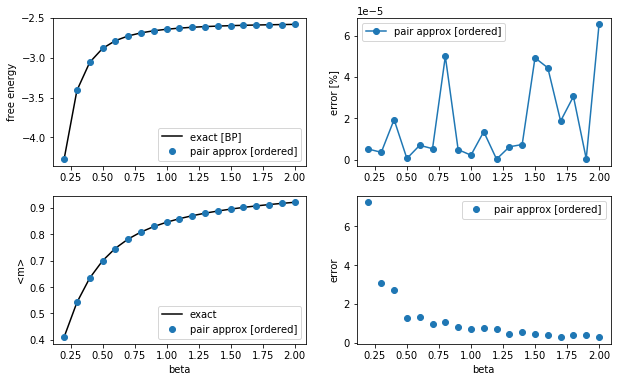

In [18]:
import matplotlib.pyplot as plt
init_ =1
name_file = "tree_large_rf.pdf"
label="fe"

others = [res_nn]
res_nn["name"] = "pair approx [ordered]"
plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact [BP]",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

others = [res_nn]

res_nn["name"] = "pair approx [ordered]"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/model_.N,
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/model_.N, "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(100. * (abs(other[label][init_:]) - abs(res_ex[label][init_:]))/abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show

In [ ]:
(100. * (abs(other[label][init_:] - res_ex[label][init_:]))/abs(res_ex[label][init_:])).sum(axis=1)/len(other[label])

In [ ]:
label

In [ ]:
(abs(other[label][init_:] - res_ex[label][init_:])/abs(res_ex[label][init_:])).sum(axis=1) / model_.N

In [ ]:
*§